
Found 7184 images belonging to 38 classes.
Found 1608 images belonging to 38 classes.


Epoch 1/2


225/225 [==============================] - 2061s 9s/step - loss: 2.0071 - accuracy: 0.4774 - val_loss: 0.9278 - val_accuracy: 0.7419
Epoch 2/2
225/225 [==============================] - 2260s 10s/step - loss: 0.9563 - accuracy: 0.7309 - val_loss: 0.6610 - val_accuracy: 0.8097


C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


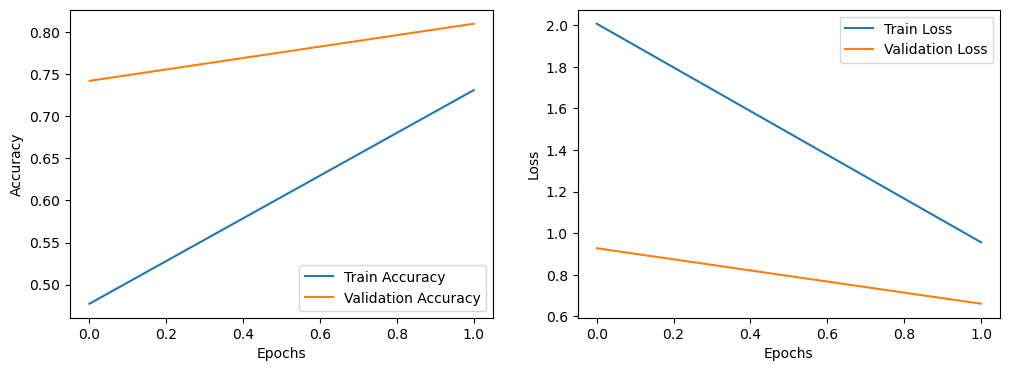

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Paths to the dataset
train_dir = r'C:\Users\user\OneDrive\Documents\python programs\jupyter\projects\plant dataset\train'
valid_dir = r'C:\Users\user\OneDrive\Documents\python programs\jupyter\projects\plant dataset\valid'

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, width_shift_range=0.2, 
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), 
                                                    batch_size=32, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(224, 224), 
                                                    batch_size=32, class_mode='categorical')

# Load the VGG16 model with pre-trained ImageNet weights, excluding the top layer
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 base layers
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(vgg_base.output)
x = Dense(512, activation='relu')(x)
x = Dense(len(train_generator.class_indices), activation='softmax')(x)  # Adjust to number of classes

model = Model(inputs=vgg_base.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_generator, validation_data=valid_generator, epochs=2, 
                    callbacks=[early_stopping])

# Save the model
model.save('plant_disease_vgg16_model.h5')

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [2]:
import json

# Save the class indices
with open('class_indices.json', 'w') as f:
    json.dump(train_generator.class_indices, f)
